In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.patches import Ellipse
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy import stats

In [2]:
mortgage_df = pd.read_csv("mortgage.csv")
mortgage_df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [3]:
results = (
    mortgage_df["default_time"]
    .value_counts()
    .sort_index()
    .rename("Frequency")
    .to_frame()
)

results["Percent"] = (results["Frequency"]/len(mortgage_df)*100).round(2)
results["Cum_Frequency"] = results["Frequency"].cumsum()
results["Cum_Percent"] = results["Percent"].cumsum().round(2)

results

,Frequency,Percent,Cum_Frequency,Cum_Percent
0,607331,97.56,607331,97.56
1,15158,2.44,622489,100.00


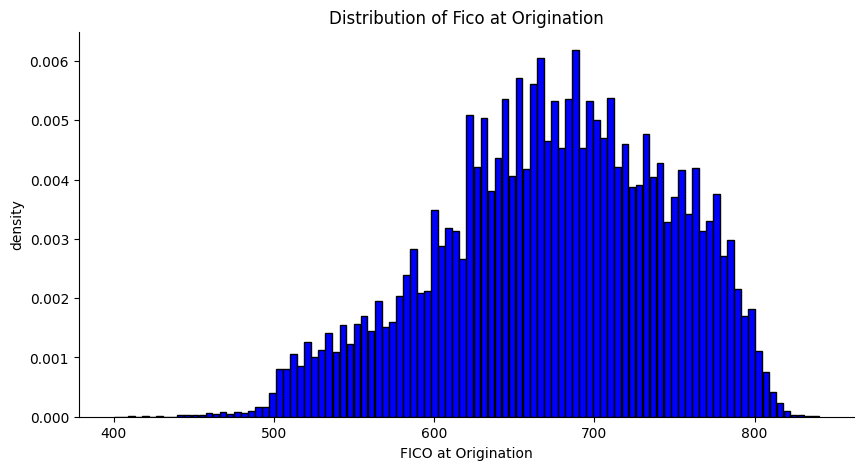

In [4]:
fig, ax = plt.subplots(figsize=(10,5)) 

ax.hist(mortgage_df['FICO_orig_time'].dropna(), color='blue',edgecolor='black', density=True, rwidth=0.95, bins=100)

sns.despine(ax=ax)
ax.set_xlabel('FICO at Origination')
ax.set_ylabel('density')
plt.title("Distribution of Fico at Origination")
plt.show()

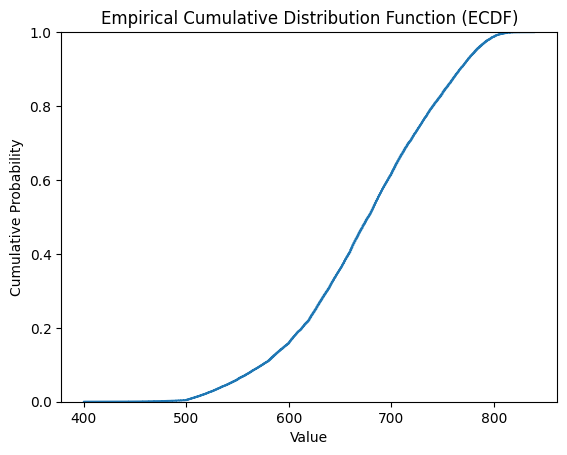

In [5]:
plt.ecdf(mortgage_df["FICO_orig_time"])
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.show()


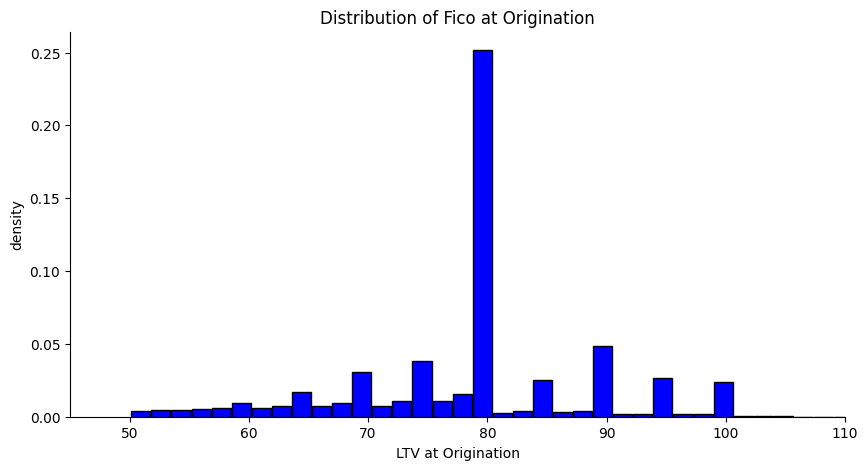

In [6]:
fig, ax = plt.subplots(figsize=(10,5)) 

ax.hist(mortgage_df['LTV_orig_time'].dropna(), color='blue',edgecolor='black', density=True, rwidth=0.95, bins=100)


sns.despine(ax=ax)
ax.set_xlabel('LTV at Origination')
ax.set_ylabel('density')
ax.set_xlim(45, 110)
plt.title("Distribution of Fico at Origination")
plt.show()

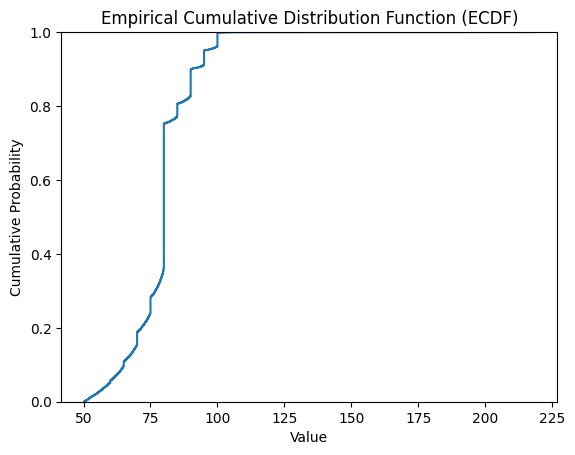

In [7]:
plt.ecdf(mortgage_df["LTV_orig_time"])
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.show()

In [8]:
cols = ["FICO_orig_time", "LTV_orig_time"]


In [9]:
import numpy as np

cols = ["FICO_orig_time", "LTV_orig_time"]

summary = (
    mortgage_df
    .groupby("default_time")
    .agg({
        "FICO_orig_time": [
            ("N", "count"),
            ("Mean", "mean"),
            ("Median", "median"),
            ("Mode", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
            ("SD", "std"),
            ("Pct01", lambda x: x.quantile(0.01)),
            ("Pct99", lambda x: x.quantile(0.99)),
        ],
        "LTV_orig_time": [
            ("N", "count"),
            ("Mean", "mean"),
            ("Median", "median"),
            ("Mode", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
            ("SD", "std"),
            ("Pct01", lambda x: x.quantile(0.01)),
            ("Pct99", lambda x: x.quantile(0.99)),
        ],
    })
    .round(2)
)
summary

FICO_orig_time                                            \
                          N    Mean Median Mode     SD   Pct01  Pct99   
default_time                                                            
0                    607331  674.23  678.0  660  71.72  506.00  802.0   
1                     15158  648.98  651.0  661  67.34  501.57  789.0   

             LTV_orig_time                                          
                         N   Mean Median  Mode     SD Pct01  Pct99  
default_time                                                        
0                   607331  78.92   80.0  80.0  10.16  52.2  100.0  
1                    15158  81.03   80.0  80.0   8.48  57.0  100.0

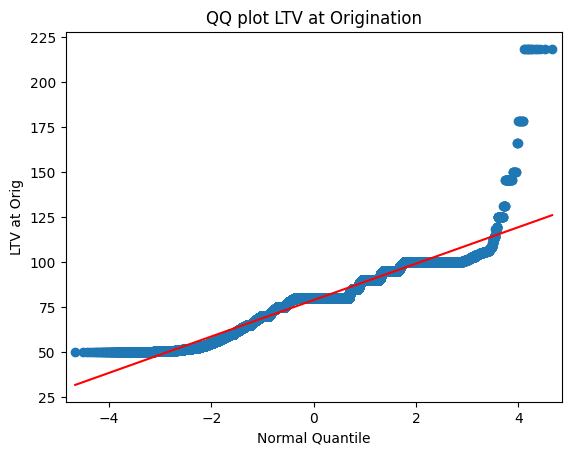

In [10]:

sm.qqplot(mortgage_df['LTV_orig_time'],line= 's')

sns.despine(ax=ax)
plt.xlabel("Normal Quantile")
plt.ylabel('LTV at Orig')

plt.title("QQ plot LTV at Origination")
plt.show()

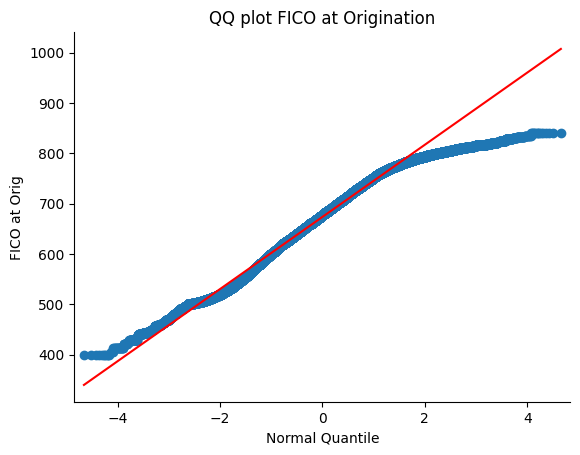

In [11]:

sm.qqplot(mortgage_df['FICO_orig_time'],line= 's')

sns.despine()
plt.xlabel("Normal Quantile")
plt.ylabel('FICO at Orig')

plt.title("QQ plot FICO at Origination")
plt.show()

In [12]:

mortgage_df["FICO_orig_time_factor"] = pd.qcut(
    mortgage_df["FICO_orig_time"],
    q=5,
    labels=[0, 1, 2, 3, 4],
    duplicates="drop"
).astype(int)


In [13]:
freq = pd.crosstab(
    mortgage_df["default_time"],
    mortgage_df["FICO_orig_time_factor"]
)

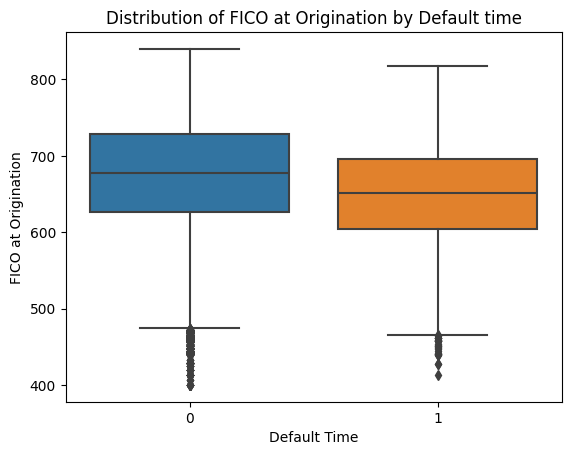

In [14]:
sns.boxplot(x=mortgage_df["default_time"],y=mortgage_df["FICO_orig_time"], data=mortgage_df)
plt.ylabel("FICO at Origination")
plt.xlabel("Default Time")
plt.title("Distribution of FICO at Origination by Default time")
plt.show()

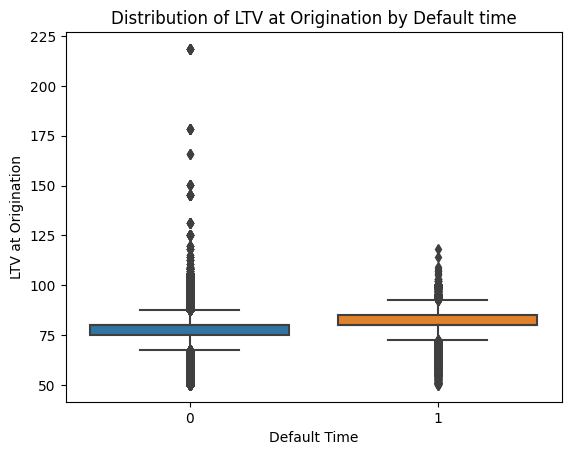

In [15]:
sns.boxplot(x=mortgage_df["default_time"],y=mortgage_df["LTV_orig_time"], data=mortgage_df)
plt.ylabel("LTV at Origination")
plt.xlabel("Default Time")
plt.title("Distribution of LTV at Origination by Default time")
plt.show()

In [16]:
np.random.seed(12345)
n_size = int(0.01 * len(mortgage_df))

#sample for FICO
sample_fico = mortgage_df['FICO_orig_time'].sample(n=n_size, replace = False)
sample_LTV = mortgage_df['LTV_orig_time'].sample(n=n_size, replace = False)
print(len(sample_fico))

6224


In [17]:
def r_cor_test(x, y, method='pearson', conf_level=0.95):
    """
    Cor.test() output for Pearson, Spearman, and Kendall.
    """
    
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    # 1. Pearson
    if method == 'pearson':
        res = stats.pearsonr(x, y)
        r = res.statistic
        p = res.pvalue
        
        # Calculate t-statistic manually (t = r * sqrt(n-2) / sqrt(1-r^2))
        df = n - 2
        # Handle perfect correlation edge case
        if abs(r) == 1.0:
            t_stat = float('inf')
        else:
            t_stat = r * np.sqrt(df / (1 - r**2))
        
        # Get Confidence Interval (SciPy 1.7+)
        ci = res.confidence_interval(conf_level)
        
        print("\n\tPearson's product-moment correlation\n")
        print(f"data:  x and y")
        print(f"t = {t_stat:.4f}, df = {df}, p-value = {p:.4e}")
        print("alternative hypothesis: true correlation is not equal to 0")
        print(f"{conf_level*100} percent confidence interval:")
        print(f" {ci.low:.7f}  {ci.high:.7f}")
        print("sample estimates:")
        print(f"      cor \n{r:.7f} ")

    # 2. Spearman
    elif method == 'spearman':
        res = stats.spearmanr(x, y)
        rho = res.statistic
        p = res.pvalue
        
        # Calculates 'S' statistic: S = (1-rho) * (n^3 - n) / 6
        S = (1 - rho) * (n**3 - n) / 6
        
        print("\n\tSpearman's rank correlation rho\n")
        print(f"data:  x and y")
        print(f"S = {S:.0f}, p-value = {p:.4e}")
        print("alternative hypothesis: true rho is not equal to 0")
        print("sample estimates:")
        print(f"      rho \n{rho:.7f} ")

    # 3. Kendall
    elif method == 'kendall':
        res = stats.kendalltau(x, y)
        tau = res.statistic
        p = res.pvalue
        
        # outputs 'z' for Kendall, which is based on normal approx
        # SciPy doesn't expose z directly, so we stick to tau/p
        print("\n\tKendall's rank correlation tau\n")
        print(f"data:  x and y")
        print(f"z = (approx), p-value = {p:.4e}")
        print("alternative hypothesis: true tau is not equal to 0")
        print("sample estimates:")
        print(f"      tau \n{tau:.7f} ")
        
    else:
        print("Method not recognized. Use 'pearson', 'spearman', or 'kendall'.")


# Run the tests 
print("--- Pearson ---")
r_cor_test(sample_fico, sample_LTV, method="pearson")

print("\n--- Spearman ---")
r_cor_test(sample_fico, sample_LTV, method="spearman")

print("\n--- Kendall ---")
r_cor_test(sample_fico, sample_LTV, method="kendall")

--- Pearson ---

	Pearson's product-moment correlation

data:  x and y
t = 0.3464, df = 6222, p-value = 7.2908e-01
alternative hypothesis: true correlation is not equal to 0
95.0 percent confidence interval:
 -0.0204556  0.0292322
sample estimates:
      cor 
0.0043910 

--- Spearman ---

	Spearman's rank correlation rho

data:  x and y
S = 40111383247, p-value = 8.8604e-01
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0018170 

--- Kendall ---

	Kendall's rank correlation tau

data:  x and y
z = (approx), p-value = 8.7893e-01
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.0013711 


In [18]:
sample_fico

552837    569
419602    713
289208    746
379893    709
53139     580
         ... 
345434    650
268808    763
328351    601
165963    703
186443    672
Name: FICO_orig_time, Length: 6224, dtype: int64

In [19]:
smple_data = np.column_stack((sample_fico, sample_LTV))
smple_data

array([[569. ,  84.6],
       [713. ,  68.5],
       [746. ,  71.9],
       ...,
       [601. , 100. ],
       [703. ,  80. ],
       [672. ,  73.1]])

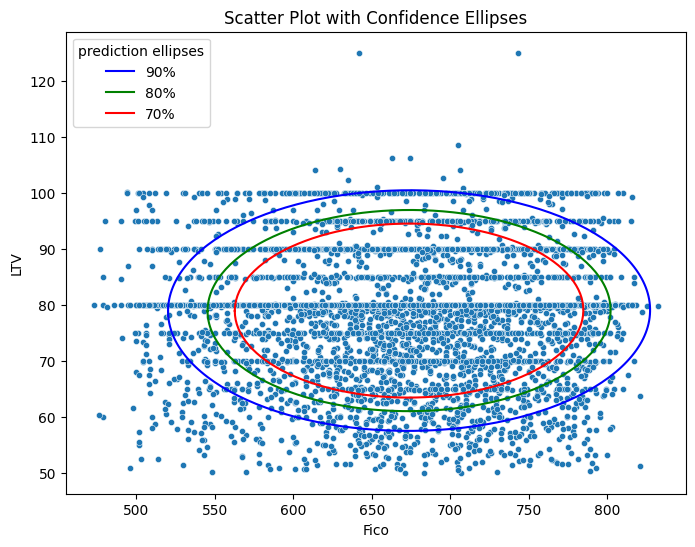

In [20]:
from scipy.stats import chi2

# ---------------------------------------------------------
# Function: return ellipse coordinates (x, y)
# ---------------------------------------------------------
def ellipse_coords(mu, cov, alpha=0.90, npoints=250):
    """
    Returns x, y coordinates for a confidence ellipse.
    mu: mean vector (2,)
    cov: covariance matrix (2x2)
    alpha: confidence level (0–1)
    npoints: number of points on ellipse
    """
    # Eigen-decomposition
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Chi-square scaling
    scale = np.sqrt(chi2.ppf(alpha, df=2))

    # Parametric angle
    t = np.linspace(0, 2*np.pi, npoints)

    # Ellipse in eigenbasis
    ellipse = np.array([scale * np.sqrt(vals[0]) * np.cos(t),
                        scale * np.sqrt(vals[1]) * np.sin(t)])

    # Rotate + shift
    coords = vecs @ ellipse
    x, y = coords[0] + mu[0], coords[1] + mu[1]

    return x, y

# ---------------------------------------------------------
# Example usage with seaborn
# ---------------------------------------------------------

# smpl_data = np.column_stack((sample_Fico, sample_LTV))
mu = smple_data.mean(axis=0) 
cov = np.cov(smple_data, rowvar=False)

plt.figure(figsize=(8,6))
sns.scatterplot(x=smple_data[:,0], y=smple_data[:,1], s=20)

# Ellipses
levels = [(0.90, "blue"), (0.80, "green"), (0.70, "red")]

for alpha, color in levels:
    x, y = ellipse_coords(mu, cov, alpha=alpha)
    plt.plot(x, y, color=color, label=f"{int(alpha*100)}%")

plt.xlabel("Fico")
plt.ylabel("LTV")
plt.title("Scatter Plot with Confidence Ellipses")
plt.legend(title="prediction ellipses", loc="upper left")
plt.show()

In [21]:
def univariate_stats(x):
    x= np.asarray(x)
    x=x[~np.isnan(x)]

    n = x.size
    mean = x.mean()
    var = x.var(ddof=1)
    sd = np.sqrt(var)

    z = norm.ppf(0.99)
    ci = z*sd/np.sqrt(n)

    return {
        "mean": round(mean,4),
        "variance" : round(var,4),
        "sd" : round(sd,4),
        "ci_lower": round(mean - ci,4),
        "ci_upper": round(mean + ci,4)
    }
univariate_stats(mortgage_df["LTV_orig_time"])

{'mean': 78.9755,
 'variance': 102.5572,
 'sd': 10.1271,
 'ci_lower': 78.9456,
 'ci_upper': 79.0053}

In [27]:

x = mortgage_df["LTV_orig_time"].dropna().values

mu_sample = x.mean()
t_stat, p_value = ttest_1samp(x, popmean=78.97545964)

print("mean:",mu_sample)
print("t-statistic:",t_stat)
print("two-sided p-value:",p_value)

mean: 78.9754596466765
t-statistic: 5.20153739496908e-07
two-sided p-value: 0.9999995849775287


We refuse to reject the Null Hypothesis since the mean = 78.97, which is greater than the pop_mean = 60. Moreover, the p_value ≈ 1.